In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
cases = {
    'Heidelberg': {'HPs & CAs': 78, 'MS': 73, 'Calcification': 78, 'Total': 813},
    'Munich': {'HPs & CAs': 30, 'MS': 0, 'Calcification': 20, 'Total': 1819},
    'Muenster': {'HPs & CAs': 27, 'MS': 20, 'Calcification': 0, 'Total': 3001},
    'Goettingen': {'HPs & CAs': 42, 'MS': 0, 'Calcification': 0, 'Total': 1829},
    'Berlin': {'HPs & CAs': 0, 'MS': 0, 'Calcification': 0, 'Total': 534},
    'Frankfurt': {'HPs & CAs': 20, 'MS': 0, 'Calcification': 20, 'Total': 42},
    'Hamburg': {'HPs & CAs': 34, 'MS': 23, 'Calcification': 0, 'Total': 60},
    'Greifswald': {'HPs & CAs': 25, 'MS': 0, 'Calcification': 0, 'Total': 26},
}

In [3]:
df = pd.DataFrame(cases).T
df.location = df.index
df.reset_index(inplace=True)
df.rename(columns={'index': 'location'}, inplace=True)
df

/tmp/ipykernel_164272/1440658890.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.location = df.index


,location,HPs & CAs,MS,Calcification,Total
0,Heidelberg,78,73,78,813
1,Munich,30,0,20,1819
2,Muenster,27,20,0,3001
3,Goettingen,42,0,0,1829
4,Berlin,0,0,0,534
5,Frankfurt,20,0,20,42
6,Hamburg,34,23,0,60
7,Greifswald,25,0,0,26


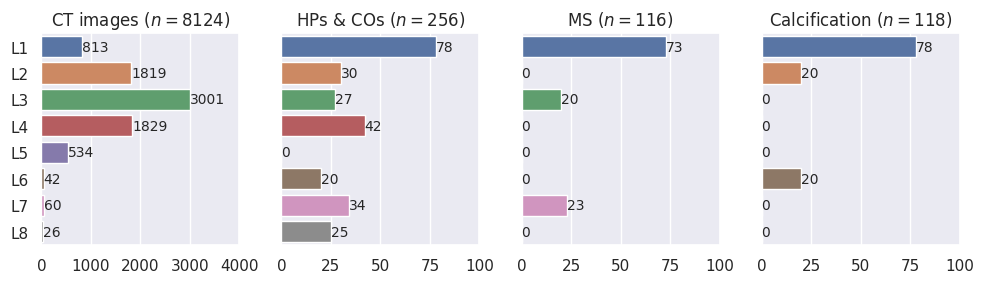

In [8]:
fig, axs = plt.subplots(1,4, figsize=(10,3))
for i, (ax, x) in enumerate(zip(axs, ['Total', 'HPs & CAs', 'MS', 'Calcification'])):
    sns.barplot(df, y='location', x=x, ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    if i > 0:
        ax.set_yticklabels([])
        ax.set_xticks([0,25,50,75,100])
    else:
        ax.set_yticklabels([f'L{i+1}' for i in range(8)])
        ax.set_xticks([0,1000,2000,3000,4000])
    ax.bar_label(ax.containers[0], fontsize=10)
    n_cases = df[x].sum()
    if x == 'Total':
        x = 'CT images'
    if x == 'HPs & CAs':
        x = 'HPs & COs'
    ax.set_title(fr'{x} ($n={n_cases}$)')
fig.tight_layout()
fig.savefig('../images/label_distribution.pdf', bbox_inches='tight')

In [9]:
loc_numbers = {
    1: 'Heidelberg', 2: 'Munich', 3: 'Muenster', 4: 'Goettingen', 5: 'Berlin', 6: 'Frankfurt', 7: 'Hamburg', 8: 'Greifswald'
}

In [37]:
cp = sns.color_palette()
#for c in cp:
[np.round(np.array(c)*255).astype('uint8') for c in cp[:4]]

[array([ 76, 114, 176], dtype=uint8),
 array([221, 132,  82], dtype=uint8),
 array([ 85, 168, 104], dtype=uint8),
 array([196,  78,  82], dtype=uint8)]